# 4.4 MLP - Stochastic Gradient Descent Method

In [1]:
''' 
 Author: Yoonhyuck WOO / JBNU_Industrial Information system Engineering
 Date; 3. 19. 2021 - 5. 24. 2021
 Title: Artificial Intelligence_Project 2
 Professor: Seung-Hoon Na'''
  
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

# Load dataset

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, flatten = True, one_hot_label = True)

In [3]:
print(x_train.shape)
print(t_train.shape)

print(np.max(x_train[0]))

(60000, 784)
(60000, 10)
1.0


In [5]:
print(t_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### ======================================

### Layer

In [4]:
class Layer():
    def __init__(self,input_size,output_size):
#         self.w = np.random.randn(input_size,output_size)
#         self.b = np.random.randn(output_size)
        
        self.w = np. random.randn(input_size,output_size)
        self.b = np.zeros(output_size)
        self.dydw = None
        self.dydb = 1 
        
    def forward(self,X):
        self.dydw = X.T
        affine = np.dot(X,self.w) + self.b
        
        return affine
    
    def backward(self,dLdy,lr):
        dLdw = np.dot(self.dydw,dLdy)
        dLdb = np.sum(np.dot(dLdy, self.dydb),axis=0)
        
        dLdx = np.dot(dLdy,np.transpose(self.w))
       
        self.w -= lr * dLdw
        
        self.b -= lr * dLdb
        
        return dLdx
        

# Make Relu class

In [5]:
class Relu():
    def __init__(self):
        self.mask = None
        
    def forward(self,x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
#         print('dout',dout.shape)
#         print('mask',self.mask.shape)
        dout[self.mask]= 0
        #dout * np.where(self.mask==True,1,0)
        return dout * np.where(self.mask == True,1,0)

## Model

In [6]:
### 마지막
class Model():
    def __init__(self):
        self.layers = []
        #layer 설정
        self.layer=[784]
        L = int(input('Number of Hidden_Layer: '))
        for i in range(L):
        #     print(i+1,'th Dimenson', end = ' ') 
        #     print(end='')
            d = int(input('Dimension:'))
            self.layer.append(d)    
        self.length = len(self.layer)
       
        for i in range(self.length-1):
            self.layers.append(Layer(self.layer[i],self.layer[i+1]))
            self.layers.append(Relu())
        self.layers.append(Layer(self.layer[-1],10))
    
    def forward(self,put):
        output = self.layers[0].forward(put)
        for i in range(1,len(self.layers)):            
            output = self.layers[i].forward(output)
        return output
    
    def backward(self, dld_, lr):
        for i in range(self.length-1,0,-1):
            dld_ = self.layers[i*2].backward(dld_, lr)
            dld_ = self.layers[i*2-1].backward(dld_)
        dld_ = self.layers[0].backward(dld_,lr)

        return dld_

# Softmax - with - Loss

In [7]:
class SoftmaxwithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
        
    def softmax(self,a):
        c = np.max(a,axis=-1,keepdims=True)
        exp_a = np.exp(a-c)
        sum_exp_a = np.sum(exp_a,axis=-1,keepdims=True)
        y = exp_a / sum_exp_a
        
        return y
    
    def cross_entropy_error(self,y,t):
        delta = 1e-13
        return -np.sum(t * np.log(y + delta)) / y.shape[0]
    
    def forward(self,x,t):
        self.t = t
        self.y = self.softmax(x)
        self.loss = self.cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

## learning

In [8]:
def accuracy(pred, target):
    pred = np.argmax(pred, axis=1)
    if target.ndim != 1 :
        target = np.argmax(target,axis=1)
        
    accuracy = np.sum(pred == target) / float(pred.shape[0])
    
    return accuracy

def learning(model,loss_func,X,y, minibatch_size, epoch_size, learning_rate):
    acc_list = []
    
    for e in range(1,epoch_size+1):
        
        combined = list(zip(X, y))
        permut = np.random.permutation(combined)
        X[:], y[:] = zip(*permut)
        
        number_minibatch= np.int(np.ceil(X.shape[0] / minibatch_size))
        
        for n in range(1, number_minibatch+1):

            X_temp=X[minibatch_size * (n-1):minibatch_size*n]
            y_temp=y[minibatch_size * (n-1):minibatch_size*n]
            
            c = model.forward(X_temp)
            J = loss_func.forward(c,y_temp)
        
            dJdh = loss_func.backward()
            model.backward(dJdh,learning_rate)

 
        c = model.forward(X)
        J = loss_func.forward(c,y)


        acc = accuracy(c, y)

        acc_list.append(acc)
        if e % iter_per_epoch == 0:
             print('*************',e,'th epoch *************')
    #             print('최종')
    #             print(J)
             print('정확도')
             print(acc)
        
    return acc_list

# 4.4

# Hidden layer:2

In [9]:
model2=Model()
swl2 = SoftmaxwithLoss()

minibatch_size = 100
iter_per_epoch = 10


epoch_size = int(input('Epeoch_size:'))
train_result2 = learning(model2, swl2, x_train, t_train, minibatch_size, epoch_size, 0.0001)
test_result2 = learning(model2, swl2, x_test, t_test, minibatch_size, epoch_size, 0.0001)
layer2 = [np.max(train_result2),np.max(test_result2)]
#learning(model, swl, x_train, t_train, minibatch_size, epoch_size, 0.0001)

Number of Hidden_Layer:  2
Dimension: 58
Dimension: 33
Epeoch_size: 130


************* 10 th epoch *************
정확도
0.34645
************* 20 th epoch *************
정확도
0.4618333333333333
************* 30 th epoch *************
정확도
0.4920833333333333
************* 40 th epoch *************
정확도
0.5167666666666667
************* 50 th epoch *************
정확도
0.5242666666666667
************* 60 th epoch *************
정확도
0.5336333333333333
************* 70 th epoch *************
정확도
0.5549666666666667
************* 80 th epoch *************
정확도
0.5924666666666667
************* 90 th epoch *************
정확도
0.59705
************* 100 th epoch *************
정확도
0.6362333333333333
************* 110 th epoch *************
정확도
0.6683666666666667
************* 120 th epoch *************
정확도
0.6865833333333333
************* 130 th epoch *************
정확도
0.70685
************* 10 th epoch *************
정확도
0.5651
************* 20 th epoch *************
정확도
0.5929
************* 30 th epoch *************
정확도
0.6514
************* 40 th epoch *************
정확도
0.7776
******

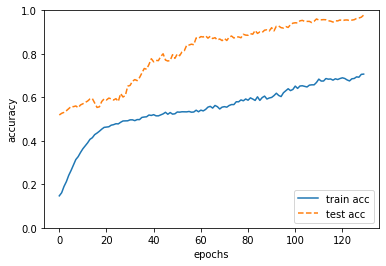

In [10]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(epoch_size)
plt.plot(x, train_result2, label='train acc')
plt.plot(x, test_result2, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# Hidden layer:1

In [11]:
model1 = Model()
swl1 = SoftmaxwithLoss()

minibatch_size = 100
iter_per_epoch = 10


epoch_size = int(input('Epeoch_size:'))
train_result1 = learning(model1, swl1, x_train, t_train, minibatch_size, epoch_size, 0.01)
test_result1 = learning(model1, swl1, x_test, t_test, minibatch_size, epoch_size, 0.01)
layer1 = [np.max(train_result1),np.max(test_result1)]
#learning(model, swl, x_train, t_train, minibatch_size, epoch_size, 0.0001)

Number of Hidden_Layer:  1
Dimension: 94
Epeoch_size: 100


************* 10 th epoch *************
정확도
0.9919833333333333
************* 20 th epoch *************
정확도
0.9983166666666666
************* 30 th epoch *************
정확도
0.9986
************* 40 th epoch *************
정확도
1.0
************* 50 th epoch *************
정확도
1.0
************* 60 th epoch *************
정확도
1.0
************* 70 th epoch *************
정확도
1.0
************* 80 th epoch *************
정확도
1.0
************* 90 th epoch *************
정확도
1.0
************* 100 th epoch *************
정확도
1.0
************* 10 th epoch *************
정확도
0.9997
************* 20 th epoch *************
정확도
1.0
************* 30 th epoch *************
정확도
1.0
************* 40 th epoch *************
정확도
1.0
************* 50 th epoch *************
정확도
1.0
************* 60 th epoch *************
정확도
1.0
************* 70 th epoch *************
정확도
1.0
************* 80 th epoch *************
정확도
1.0
************* 90 th epoch *************
정확도
1.0
************* 100 th epoch *************
정확도
1.0


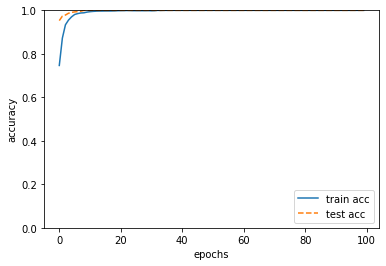

In [12]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(epoch_size)
plt.plot(x, train_result1, label='train acc')
plt.plot(x, test_result1, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# Hidden layer:3

In [13]:
model3 = Model()
swl3 = SoftmaxwithLoss()

minibatch_size = 100
iter_per_epoch = 10


epoch_size = int(input('Epeoch_size:'))
train_result3 = learning(model3, swl3, x_train, t_train, minibatch_size, epoch_size, 0.00001)
test_result3 = learning(model3, swl3, x_test, t_test, minibatch_size, epoch_size, 0.00001)
layer3 = [np.max(train_result3),np.max(test_result3)]
#learning(model, swl, x_train, t_train, minibatch_size, epoch_size, 0.0001)

Number of Hidden_Layer:  3
Dimension: 100
Dimension: 50
Dimension: 30
Epeoch_size: 140


************* 10 th epoch *************
정확도
0.3343
************* 20 th epoch *************
정확도
0.4433666666666667
************* 30 th epoch *************
정확도
0.49065
************* 40 th epoch *************
정확도
0.5748666666666666
************* 50 th epoch *************
정확도
0.6089666666666667
************* 60 th epoch *************
정확도
0.6511
************* 70 th epoch *************
정확도
0.68565
************* 80 th epoch *************
정확도
0.66805
************* 90 th epoch *************
정확도
0.7127333333333333
************* 100 th epoch *************
정확도
0.66705
************* 110 th epoch *************
정확도
0.6805666666666667
************* 120 th epoch *************
정확도
0.6972666666666667
************* 130 th epoch *************
정확도
0.7261166666666666
************* 140 th epoch *************
정확도
0.7582666666666666
************* 10 th epoch *************
정확도
0.5883
************* 20 th epoch *************
정확도
0.7072
************* 30 th epoch *************
정확도
0.7872
************* 40 th epoch **

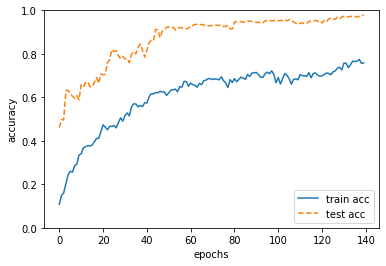

In [14]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(epoch_size)
plt.plot(x, train_result3, label='train acc')
plt.plot(x, test_result3, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# Hidden layer:4

In [15]:
model4 = Model()
swl4 = SoftmaxwithLoss()

minibatch_size = 100
iter_per_epoch = 10


epoch_size = int(input('Epeoch_size:'))
train_result4 = learning(model4, swl4, x_train, t_train, minibatch_size, epoch_size, 0.000001)
test_result4 = learning(model4, swl4, x_test, t_test, minibatch_size, epoch_size, 0.000001)
layer4 = [np.max(train_result4),np.max(test_result4)]
#learning(model, swl, x_train, t_train, minibatch_size, epoch_size, 0.0001)

Number of Hidden_Layer:  4
Dimension: 130
Dimension: 94
Dimension: 85
Dimension: 76
Epeoch_size: 150


************* 10 th epoch *************
정확도
0.43416666666666665
************* 20 th epoch *************
정확도
0.6153
************* 30 th epoch *************
정확도
0.7089166666666666
************* 40 th epoch *************
정확도
0.8798833333333334
************* 50 th epoch *************
정확도
0.8466833333333333
************* 60 th epoch *************
정확도
0.8603833333333334
************* 70 th epoch *************
정확도
0.90255
************* 80 th epoch *************
정확도
0.9057166666666666
************* 90 th epoch *************
정확도
0.9288
************* 100 th epoch *************
정확도
0.8881166666666667
************* 110 th epoch *************
정확도
0.89705
************* 120 th epoch *************
정확도
0.9246166666666666
************* 130 th epoch *************
정확도
0.9397166666666666
************* 140 th epoch *************
정확도
0.9021666666666667
************* 150 th epoch *************
정확도
0.9682166666666666
************* 10 th epoch *************
정확도
0.7913
************* 20 th epoch *************
정확도

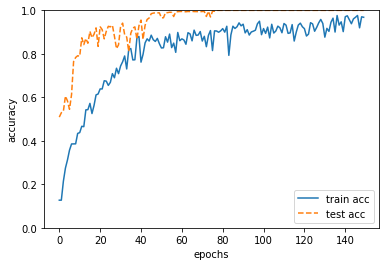

In [16]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(epoch_size)
plt.plot(x, train_result4, label='train acc')
plt.plot(x, test_result4, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [17]:
data = {
    'layer':['1','2','3','4'],
    'train_Accuracy' : [np.max(train_result1),np.max(train_result2),np.max(train_result3),np.max(train_result4)],
    'test_Accuracy' : [np.max(test_result1),np.max(test_result2),np.max(test_result3),np.max(test_result4)]
} 
Table = pd.DataFrame(data)
Table.set_index('layer')

,train_Accuracy,test_Accuracy
layer,,
1,1.000000,1.0000
2,0.706850,0.9782
3,0.774733,0.9784
4,0.976483,1.0000
